In [1]:
%matplotlib inline  

import boto3
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
from io import BytesIO


In [2]:
def detect_labels(photo, bucket):
    client = boto3.client('rekognition')

    response = client.detect_labels(
        Image={'S3Object': {'Bucket': bucket, 'Name': photo}},
        MaxLabels=10
    )

    print('Detected labels for', photo, '\n')
    for label in response['Labels']:
        print("Label:", label['Name'])
        print("Confidence:", label['Confidence'])
        print()

    s3 = boto3.resource('s3')
    obj = s3.Object(bucket, photo)
    img_data = obj.get()['Body'].read()
    img = Image.open(BytesIO(img_data))

    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    ax = plt.gca()

    for label in response['Labels']:
        for instance in label.get('Instances', []):
            bbox = instance['BoundingBox']
            left = bbox['Left'] * img.width
            top = bbox['Top'] * img.height
            width = bbox['Width'] * img.width
            height = bbox['Height'] * img.height

            rect = patches.Rectangle(
                (left, top),
                width,
                height,
                linewidth=1,
                edgecolor='r',
                facecolor='none'
            )
            ax.add_patch(rect)

            label_text = f"{label['Name']} ({round(label['Confidence'], 2)}%)"
            plt.text(
                left,
                top - 2,
                label_text,
                color='r',
                fontsize=8,
                bbox=dict(facecolor='white', alpha=0.7)
            )

    plt.axis('off')
    plt.show()   

    return len(response['Labels'])


Detected labels for preview16.jpg 

Label: Person
Confidence: 99.99938201904297

Label: Walking
Confidence: 99.99938201904297

Label: Pedestrian
Confidence: 99.9708251953125

Label: Adult
Confidence: 99.85748291015625

Label: Female
Confidence: 99.85748291015625

Label: Woman
Confidence: 99.85748291015625

Label: City
Confidence: 99.74993133544922

Label: High Heel
Confidence: 99.36122131347656

Label: Handbag
Confidence: 98.91337585449219

Label: Car
Confidence: 98.44910430908203



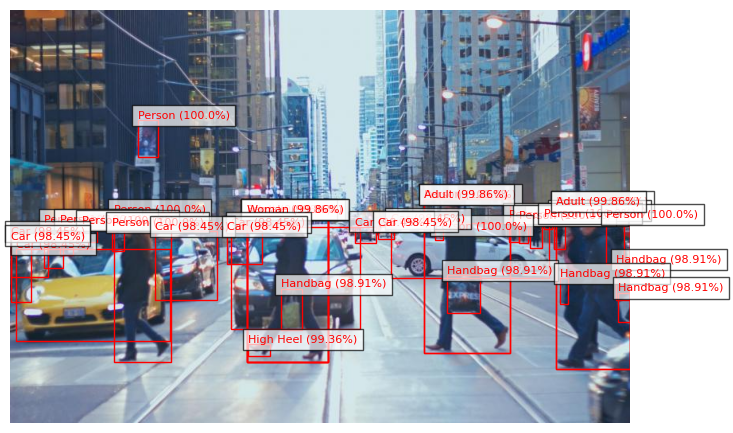

Labels detected: 10


In [3]:
photo = "preview16.jpg"
bucket = "sohailm2-aws-rekognition-label-images"

label_count = detect_labels(photo, bucket)
print("Labels detected:", label_count)
